# Coffee Sales - Exploratory Data Analysis

Quick Exploratory Data Analysis for [Coffee Sales](https://www.kaggle.com/datasets/ihelon/coffee-sales) dataset    

This dataset contains detailed records of coffee sales from a vending machine. It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products.

![](https://storage.googleapis.com/kaggle-datasets-images/5328600/8852356/51447233be78d623e2686af35aa08bc2/dataset-cover.jpeg?t=2024-07-03-19-34-12)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#66462F; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

* [Overview](#1)
* [General Visualization](#2)
* [feature Engineering](#3)

<a id="1"></a>
<h2 style='background:#66462F; border:0; color:white'><center>Overview<center><h2>

This dataset contains detailed information about coffee purchases. Below are the descriptions of each column in the dataset:

| Column Name | Description                  | Type        |
|-------------|------------------------------|-------------|
| date      | Date of purchasing           | Date        |
| datetime  | Datetime of purchasing       | Datetime    |
| cash_type | Cash or card purchasing      | String (Categorical) |
| card      | Anonymous card number        | String      |
| money     | Amount of money in Ukrainian hryvnias | Float       |
| coffee_name | Coffee type               | String (Categorical) |

In [1]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/coffee-sales/index.csv")

In [3]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
2170,2024-10-31,2024-10-31 07:54:17.331,card,ANON-0000-0000-0703,35.76,Latte
2171,2024-10-31,2024-10-31 08:38:53.898,card,ANON-0000-0000-0683,35.76,Latte
2172,2024-10-31,2024-10-31 09:18:19.100,card,ANON-0000-0000-0276,30.86,Americano with Milk
2173,2024-10-31,2024-10-31 15:59:26.688,card,ANON-0000-0000-0843,35.76,Latte


In [4]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["time"] = df["datetime"].dt.time
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")
df["week"] = df["date"].dt.to_period("W")

In [5]:
df

,date,datetime,cash_type,card,money,coffee_name,time,month,week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10:15:50.520000,2024-03,2024-02-26/2024-03-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:19:22.539000,2024-03,2024-02-26/2024-03-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:20:18.089000,2024-03,2024-02-26/2024-03-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13:46:33.006000,2024-03,2024-02-26/2024-03-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13:48:14.626000,2024-03,2024-02-26/2024-03-03
...,...,...,...,...,...,...,...,...,...
2170,2024-10-31,2024-10-31 07:54:17.331,card,ANON-0000-0000-0703,35.76,Latte,07:54:17.331000,2024-10,2024-10-28/2024-11-03
2171,2024-10-31,2024-10-31 08:38:53.898,card,ANON-0000-0000-0683,35.76,Latte,08:38:53.898000,2024-10,2024-10-28/2024-11-03
2172,2024-10-31,2024-10-31 09:18:19.100,card,ANON-0000-0000-0276,30.86,Americano with Milk,09:18:19.100000,2024-10,2024-10-28/2024-11-03
2173,2024-10-31,2024-10-31 15:59:26.688,card,ANON-0000-0000-0843,35.76,Latte,15:59:26.688000,2024-10,2024-10-28/2024-11-03


Total Money

In [6]:
df["money"].sum()

69002.51999999999

Card Money and Cash Money

In [7]:
df[df["cash_type"] == "card"]["money"].sum(), df[df["cash_type"] == "cash"]["money"].sum()

(65816.51999999999, 3186.0)

Total Cups

In [8]:
df["money"].count()

2175

Card Cups and Cash Cups

In [9]:
df[df["cash_type"] == "card"]["money"].count(), df[df["cash_type"] == "cash"]["money"].count()

(2086, 89)

<a id="1"></a>
<h2 style='background:#66462F; border:0; color:white'><center>General Visualizations<center><h2>

### Money for each month

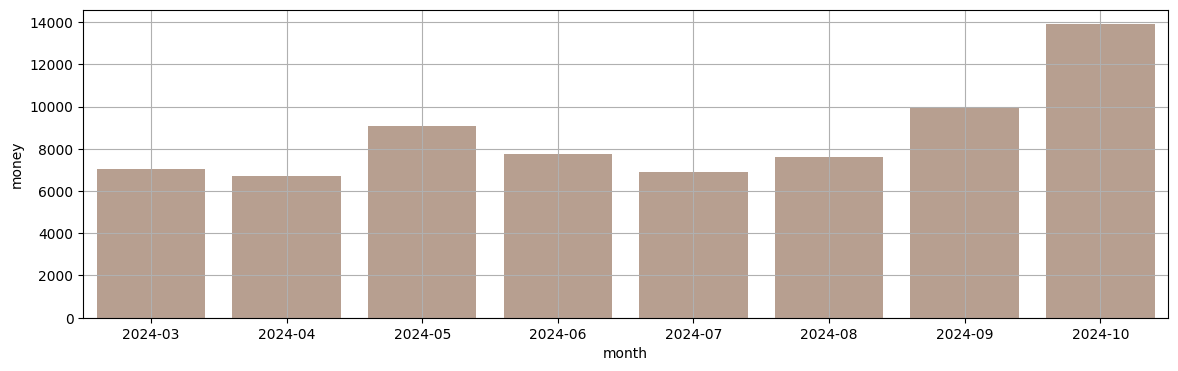

In [10]:
df_by_month = df.groupby("month").agg({"money": ["sum", "count"]}).reset_index()
df_by_month.columns = ["month", "money", "cups"]

plt.figure(figsize=(14, 4))
sns.barplot(df_by_month, y="money", x="month", color="#bd9e8a")
plt.grid()

### Money for each week

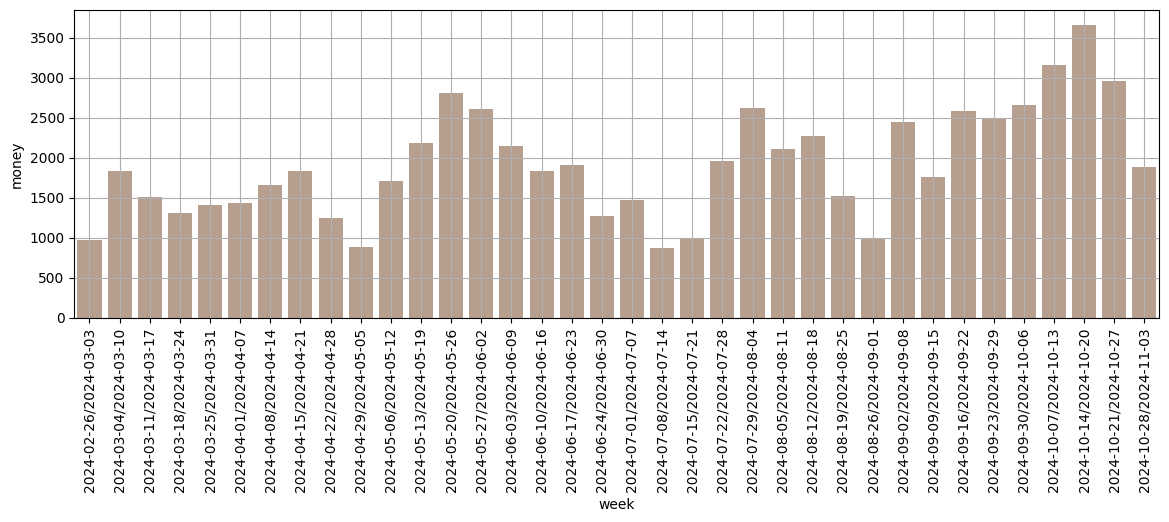

In [11]:
df_by_month = df.groupby("week").agg({"money": ["sum", "count"]}).reset_index()
df_by_month.columns = ["week", "money", "cups"]

plt.figure(figsize=(14, 4))
sns.barplot(df_by_month, y="money", x="week", color="#bd9e8a")
plt.xticks(rotation=90)
plt.grid()

### Money for each day

(0.0, 878.4929999999999)

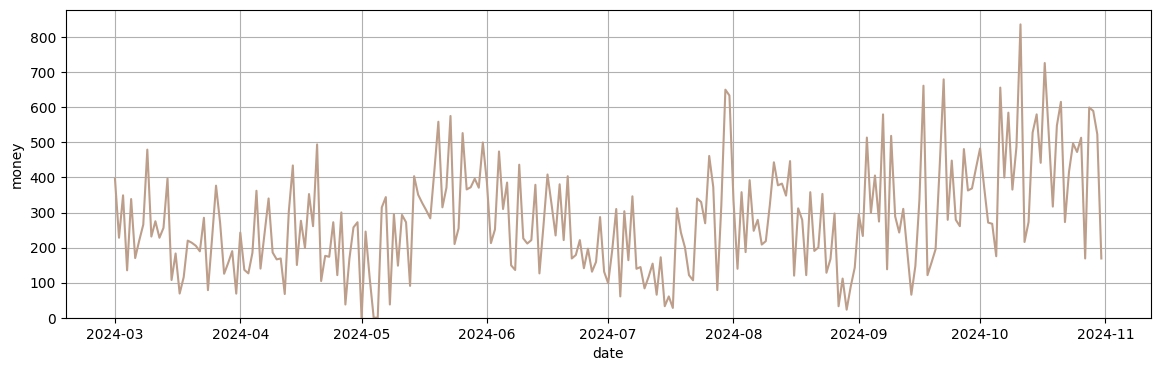

In [12]:
date_range = pd.date_range(start=df["date"].min(), end=df["date"].max())
complete_dates = pd.DataFrame(date_range, columns=["date"])
df_by_date = df.groupby("date").agg({"money": ["sum", "count"]}).reset_index()
df_by_date.columns = ["date", "money", "cups"]
df_complete = pd.merge(complete_dates, df_by_date, on="date", how="left")
df_complete.fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_complete, y="money", x="date", color="#bd9e8a")
plt.grid()
plt.ylim(0)

### Distribution by Coffee Type

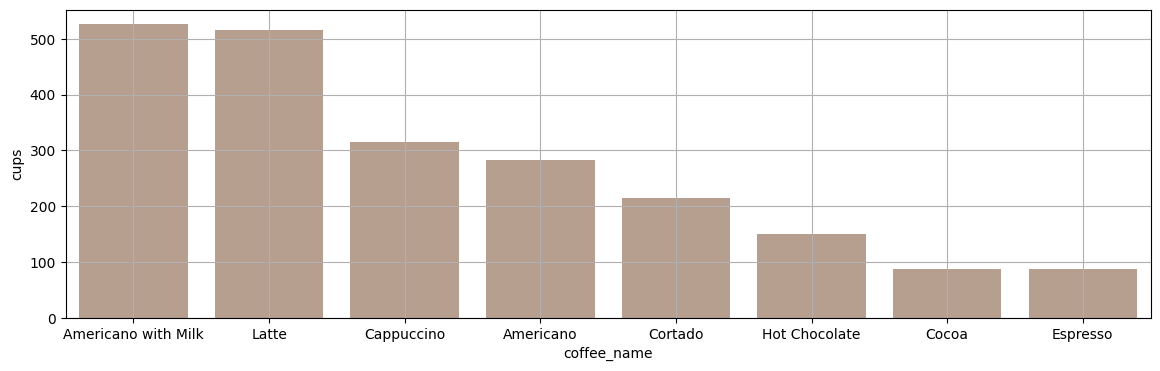

In [13]:
df_by_coffee = df.groupby("coffee_name").agg({"money": "count"}).reset_index()
df_by_coffee.columns = ["coffee_name", "cups"]
df_by_coffee = df_by_coffee.sort_values("cups", ascending=False)

plt.figure(figsize=(14, 4))
sns.barplot(df_by_coffee, x="coffee_name", y="cups", color="#bd9e8a")
plt.grid()

### Distribution by Purchasing Time

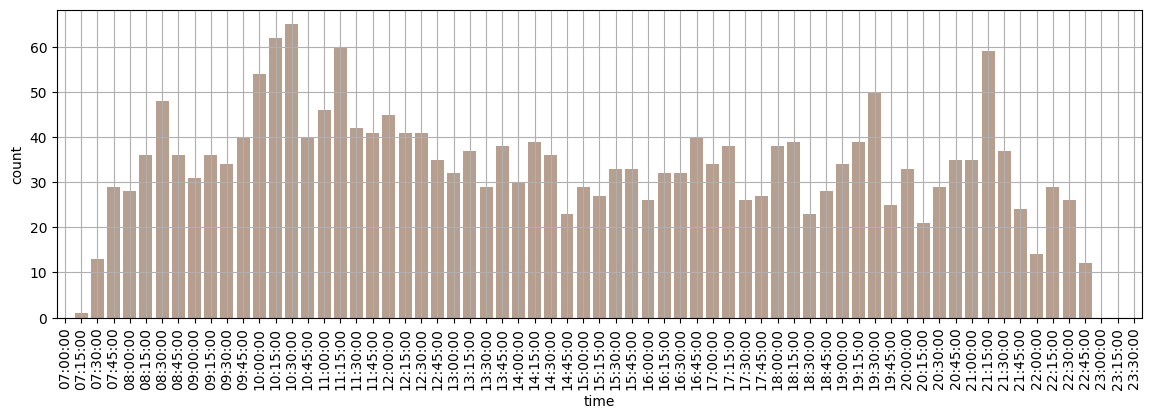

In [14]:
df['time'] = df['datetime'].dt.floor('15T').dt.time
df_by_hour = df.groupby("time").agg({"money": ["count"]}).reset_index()
df_by_hour.columns = ["time", "count"]

all_intervals = pd.DataFrame(
    np.unique(pd.date_range(
        start=pd.to_datetime("2024-01-01 07:00:00").replace(second=0, microsecond=0), 
        end=pd.to_datetime("2024-01-01 23:30:00").replace(second=0, microsecond=0), 
        freq='15T'
    ).time), columns=['time']
)
df_by_hour = pd.merge(all_intervals, df_by_hour, on='time', how='left').fillna(0)
# df_by_hour["time"] = pd.to_datetime(df_by_hour["time"], format='%H:%M:%S')

plt.figure(figsize=(14, 4))
sns.barplot(df_by_hour, x="time", y="count", color="#bd9e8a")
plt.xticks(rotation=90)
plt.grid()

### Mean check in a day

(0.0, 41.3175)

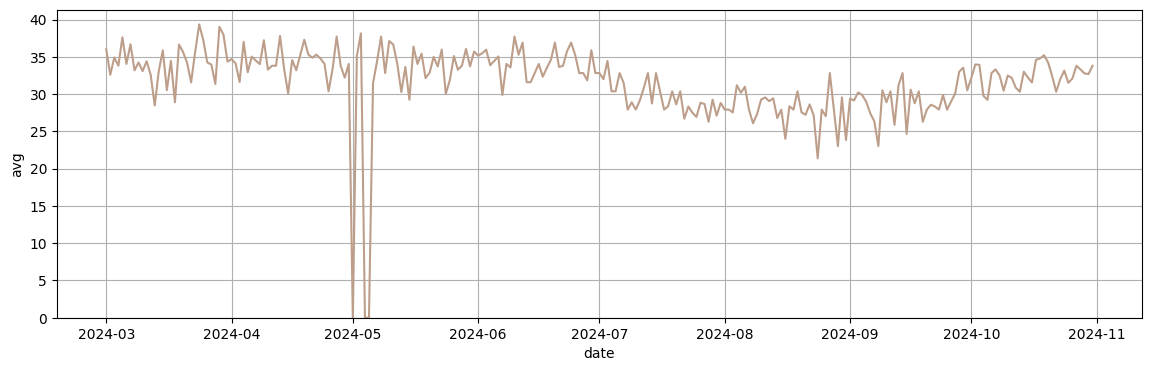

In [15]:
date_range = pd.date_range(start=df["date"].min(), end=df["date"].max())
complete_dates = pd.DataFrame(date_range, columns=["date"])
df_by_date = df.groupby("date").agg({"money": ["mean"]}).reset_index()
df_by_date.columns = ["date", "avg"]
df_complete = pd.merge(complete_dates, df_by_date, on="date", how="left")
df_complete.fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_complete, y="avg", x="date", color="#bd9e8a")
plt.grid()
plt.ylim(0)

### Mean check in a day for each coffee type

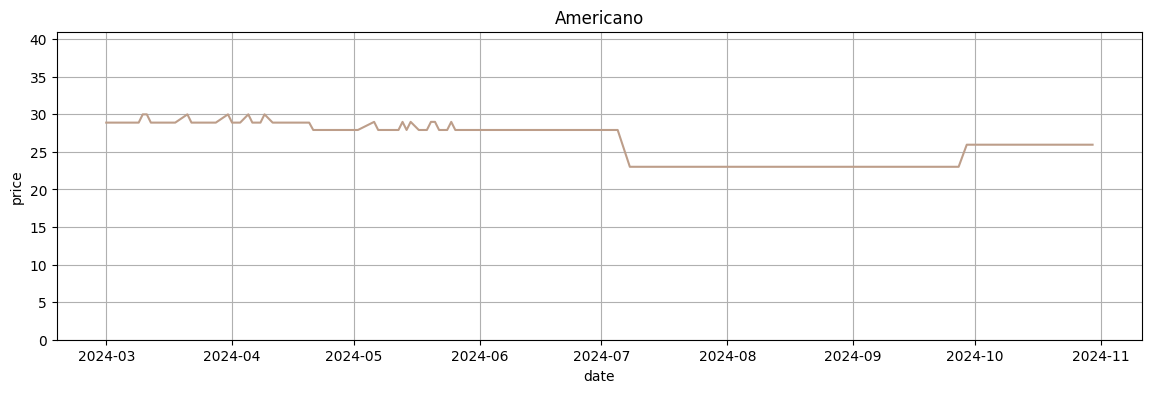

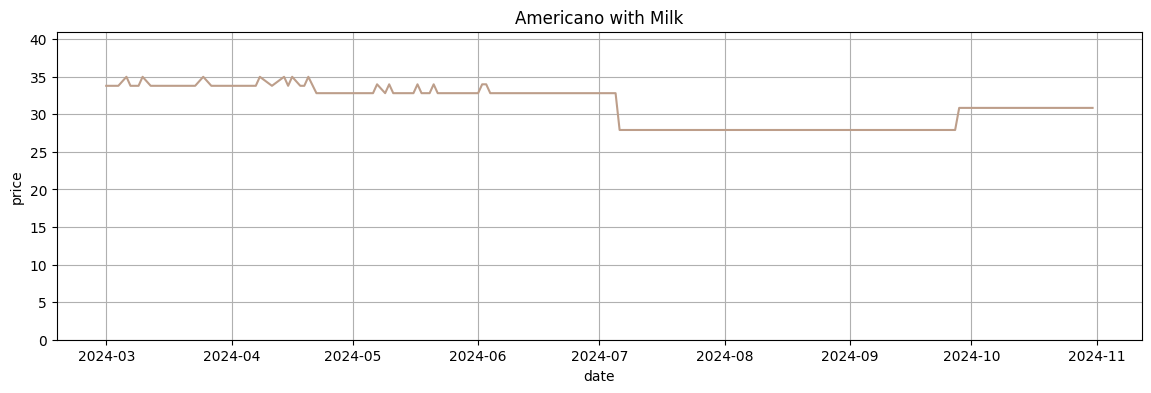

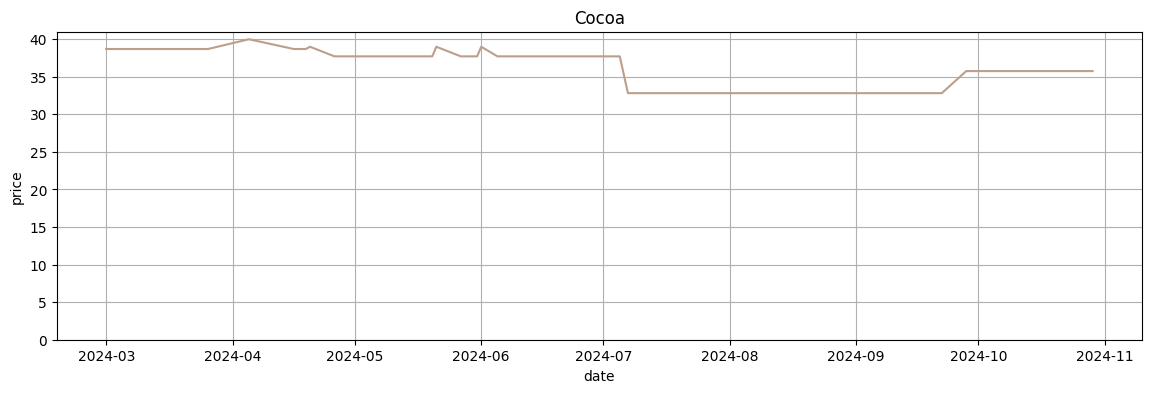

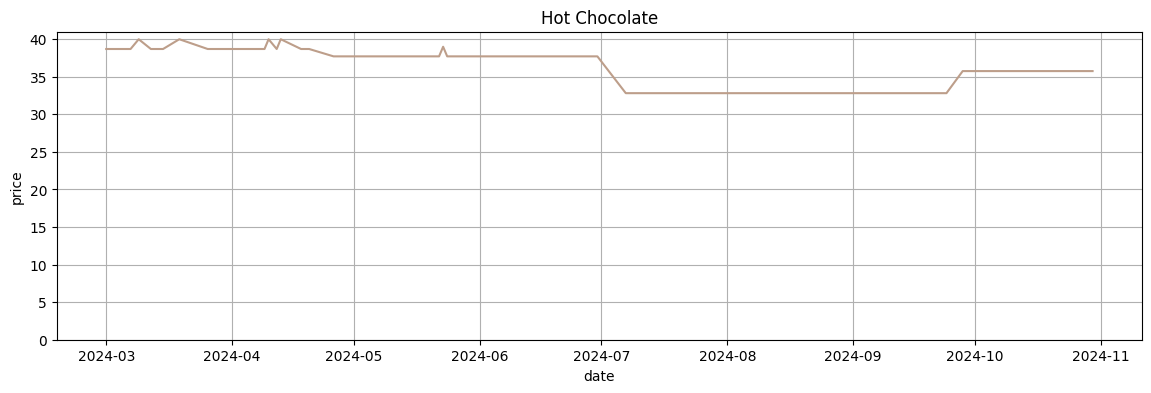

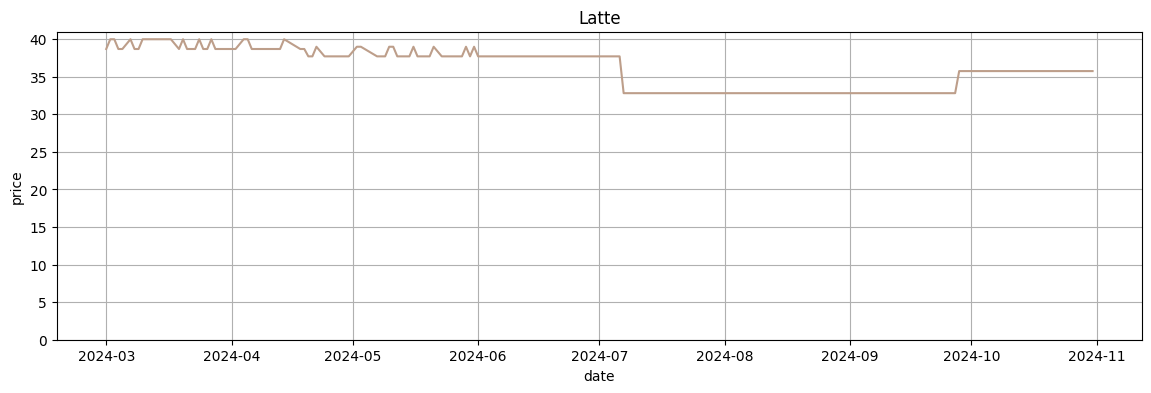

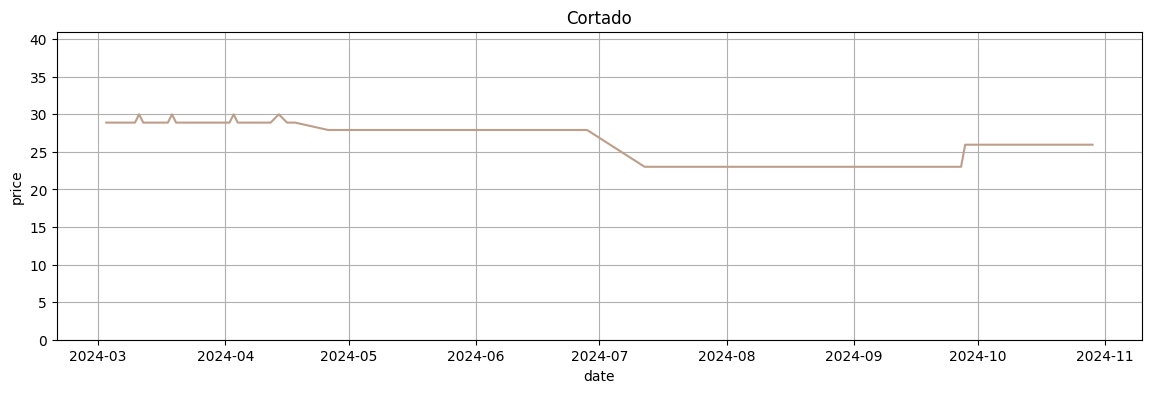

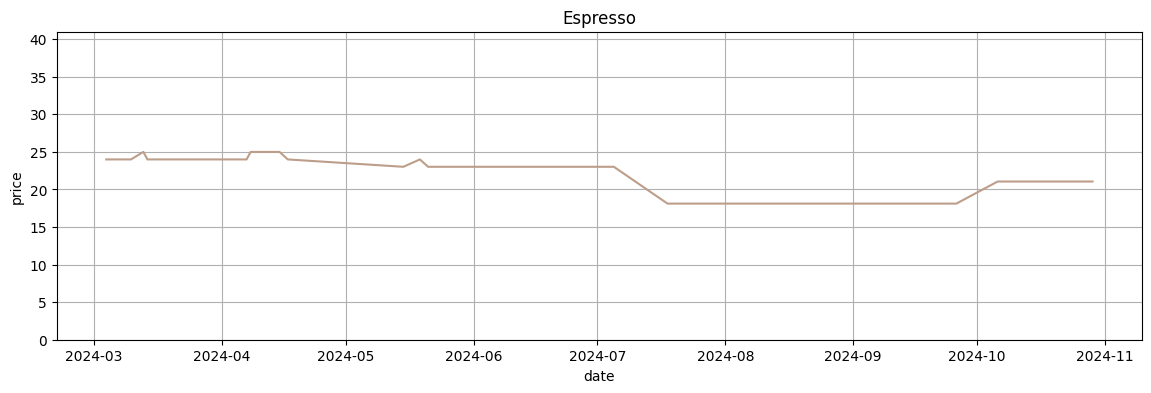

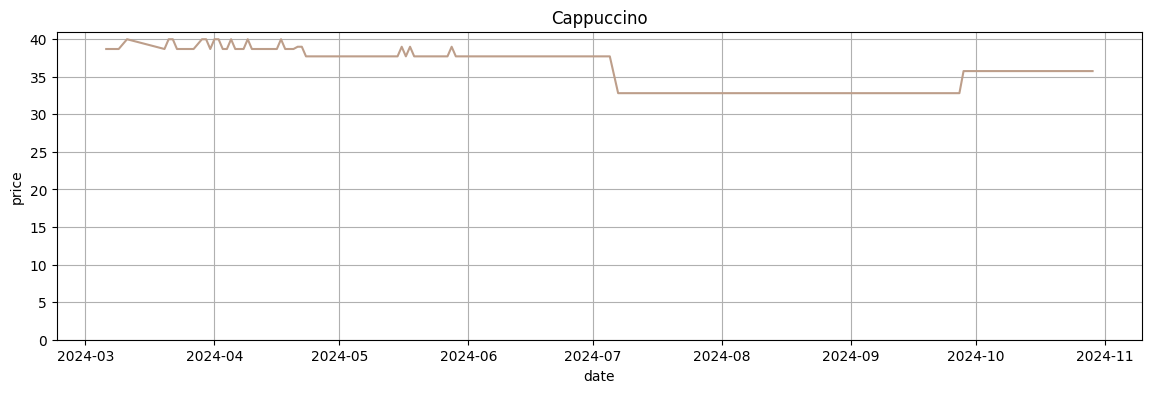

In [16]:
date_range = pd.date_range(start=df["date"].min(), end=df["date"].max())
complete_dates = pd.DataFrame(date_range, columns=["date"])
df_by_date = df.groupby(["date", "coffee_name"]).agg({"money": ["max"]}).reset_index()
df_by_date.columns = ["date", "coffee_name", "price"]

# Plotting
for x in df_by_date["coffee_name"].unique():
    plt.figure(figsize=(14, 4))
    plt.title(x)
    sns.lineplot(data=df_by_date[df_by_date["coffee_name"] == x], y="price", x="date", color="#bd9e8a")
    plt.grid()
    plt.ylim(0, 41)

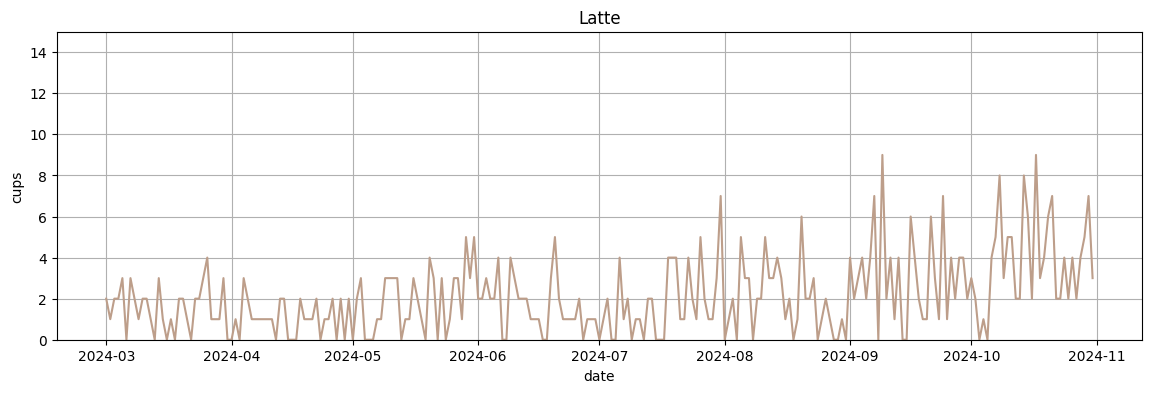

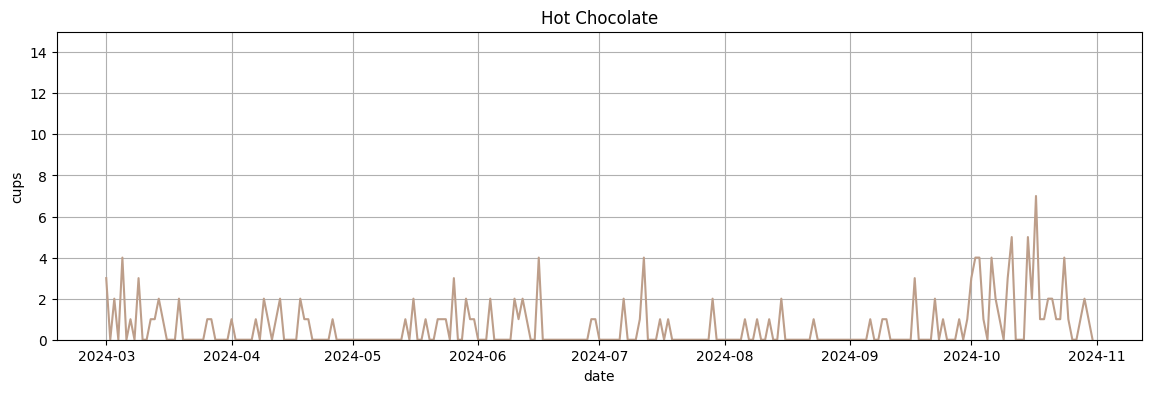

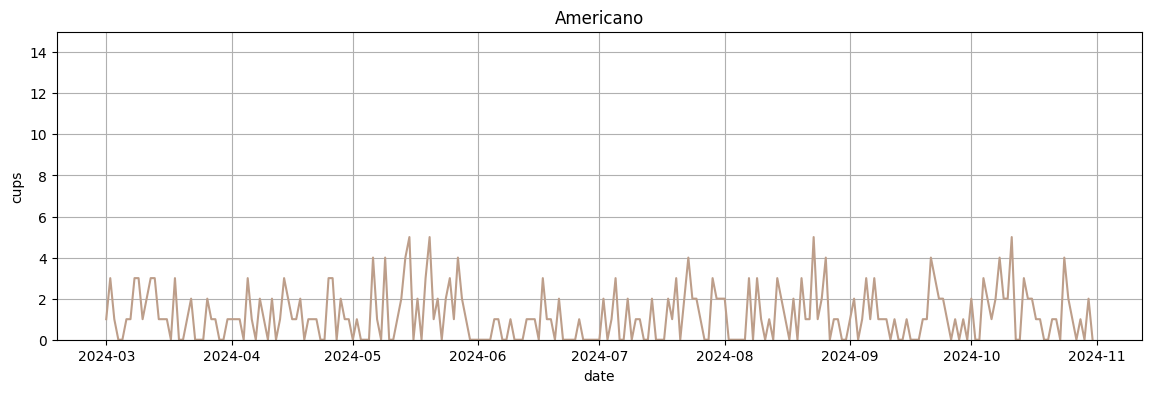

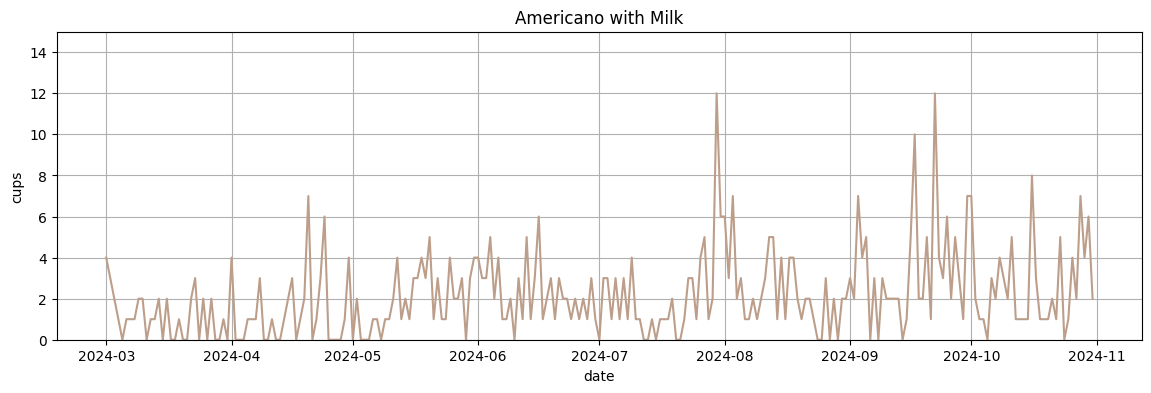

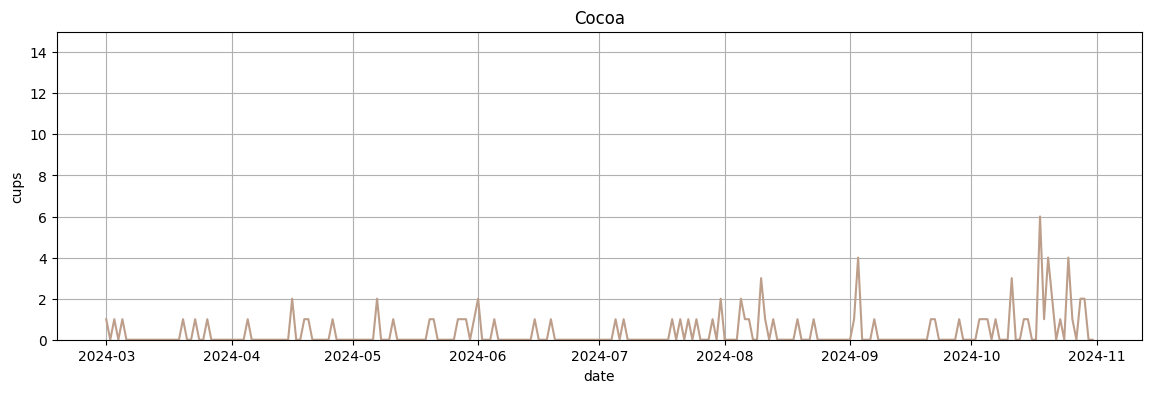

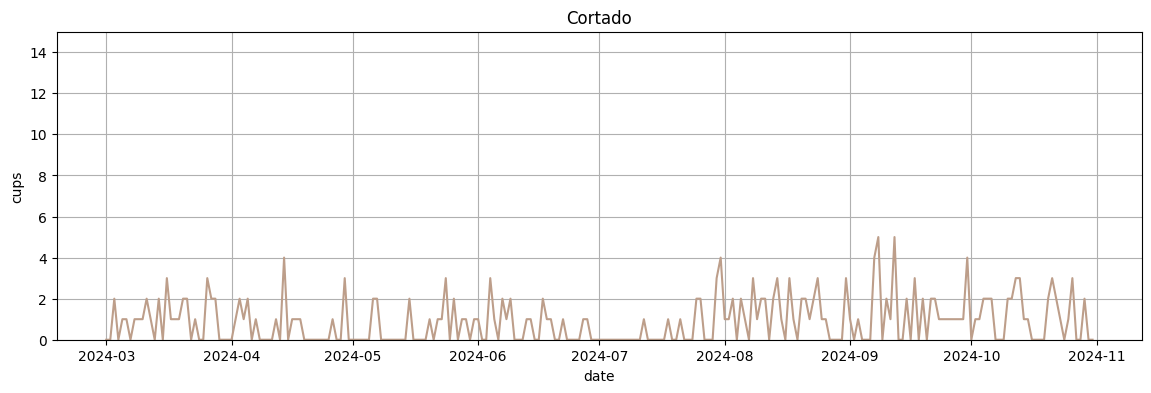

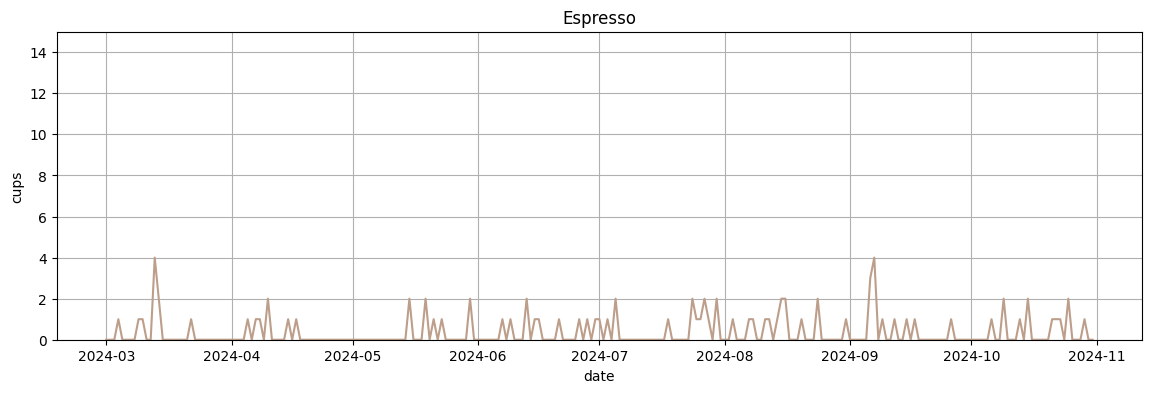

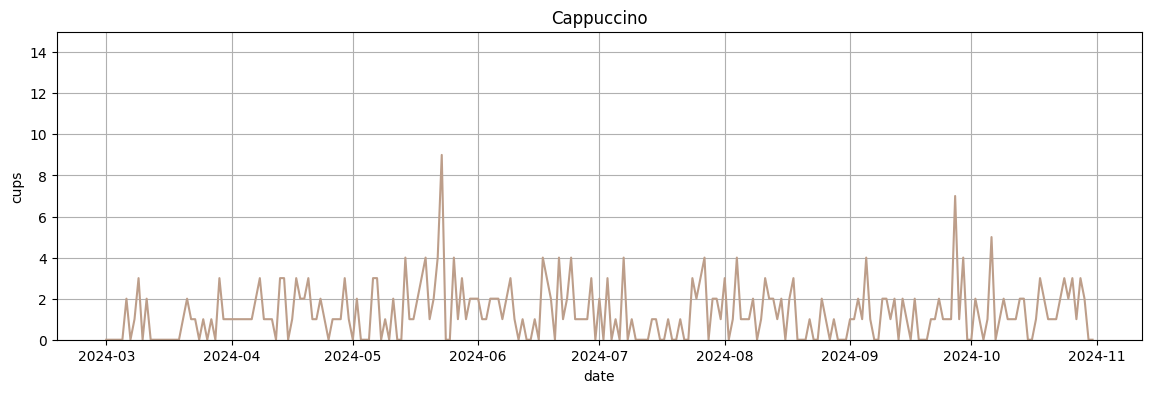

In [17]:
date_range = pd.date_range(start=df["date"].min(), end=df["date"].max())
coffee_names = df["coffee_name"].unique()
pairs = list(itertools.product(date_range, coffee_names))
pairs_df = pd.DataFrame(pairs, columns=["date", "coffee_name"])

df_by_date_coffe = df.groupby(["date", "coffee_name"]).agg({"money": ["sum", "count"]}).reset_index()
df_by_date_coffe.columns = ["date", "coffee_name", "money", "cups"]
df_complete = pd.merge(pairs_df, df_by_date_coffe, on=["date", "coffee_name"], how="left")
df_complete.fillna(0, inplace=True)

for x in coffee_names:
    plt.figure(figsize=(14, 4))
    plt.title(x)
    sns.lineplot(data=df_complete[df_complete["coffee_name"] == x], y="cups", x="date", color="#bd9e8a")
    plt.grid()
    plt.ylim(0, 15)

<a id="2"></a>
<h2 style='background:#66462F; border:0; color:white'><center>Feature Engineering<center><h2>

In [18]:
df

,date,datetime,cash_type,card,money,coffee_name,time,month,week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10:15:00,2024-03,2024-02-26/2024-03-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:15:00,2024-03,2024-02-26/2024-03-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:15:00,2024-03,2024-02-26/2024-03-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13:45:00,2024-03,2024-02-26/2024-03-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13:45:00,2024-03,2024-02-26/2024-03-03
...,...,...,...,...,...,...,...,...,...
2170,2024-10-31,2024-10-31 07:54:17.331,card,ANON-0000-0000-0703,35.76,Latte,07:45:00,2024-10,2024-10-28/2024-11-03
2171,2024-10-31,2024-10-31 08:38:53.898,card,ANON-0000-0000-0683,35.76,Latte,08:30:00,2024-10,2024-10-28/2024-11-03
2172,2024-10-31,2024-10-31 09:18:19.100,card,ANON-0000-0000-0276,30.86,Americano with Milk,09:15:00,2024-10,2024-10-28/2024-11-03
2173,2024-10-31,2024-10-31 15:59:26.688,card,ANON-0000-0000-0843,35.76,Latte,15:45:00,2024-10,2024-10-28/2024-11-03


In [19]:
date_range = pd.date_range(start=df["date"].min(), end=df["date"].max())
complete_dates = pd.DataFrame(date_range, columns=["date"])
df_by_date = df.groupby("date")[["money"]].sum().reset_index()
df_by_date.columns = ["date", "target_money"]
df_fe = pd.merge(complete_dates, df_by_date, on="date", how="left")
df_fe.fillna(0, inplace=True)
df_fe = df_fe.sort_values("date")

Lags

In [20]:
df_fe["prev_1d_money"] = df_fe["target_money"].shift(1)
df_fe["prev_2d_money"] = df_fe["target_money"].shift(2)
df_fe["prev_3d_money"] = df_fe["target_money"].shift(3)
df_fe["prev_7d_money"] = df_fe["target_money"].shift(7)

In [21]:
df_fe

,date,target_money,prev_1d_money,prev_2d_money,prev_3d_money,prev_7d_money
0,2024-03-01,396.30,NaN,NaN,NaN,NaN
1,2024-03-02,228.10,396.30,NaN,NaN,NaN
2,2024-03-03,349.10,228.10,396.30,NaN,NaN
3,2024-03-04,135.20,349.10,228.10,396.30,NaN
4,2024-03-05,338.50,135.20,349.10,228.10,NaN
...,...,...,...,...,...,...
240,2024-10-27,169.00,513.36,472.70,497.20,547.66
241,2024-10-28,599.58,169.00,513.36,472.70,615.74
242,2024-10-29,589.78,599.58,169.00,513.36,272.84
243,2024-10-30,523.16,589.78,599.58,169.00,415.88


## WORK IN PROGRESS...